In [1]:
machine = 'mac'
machine = 'magny'


In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import copy

from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *
%matplotlib inline

In [3]:
level = 4
if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
j = 0
for halo_number in [24]:  # range(1, 31):
    halodir = basedir+"halo_{0}/".format(halo_number)
    snappath = halodir+"output/"
    for snapnr in range(127,128,1):
        print("level   : {0}".format(level))
        print("halo    : {0}".format(halo_number))
        print("snapnr  : {0}".format(snapnr))
        print("basedir : {0}".format(basedir))
        print("halodir : {0}".format(halodir))
        print("snappath: {0}\n".format(snappath))
        s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[0,1,2,3,4,5], 
            haloid=0, galradfac=0.1, verbose=True) 

        # Clean negative and zero values of gmet to avoid RuntimeErrors
        # later on (e.g. dividing by zero)
        s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )
     

level   : 4
halo    : 24
snapnr  : 127
basedir : /hits/universe/GigaGalaxy/level4_MHD/
halodir : /hits/universe/GigaGalaxy/level4_MHD/halo_24/
snappath: /hits/universe/GigaGalaxy/level4_MHD/halo_24/output/

[ 34.42281723  33.16259384  37.29567337]
Found 1783163 stars.
Rotated pos.
Rotated bfld.
Rotated vel.

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]



In [4]:
istars, = np.where( (s.type == 4) & (s.halo == 0) )#& (s.r() > 0.) & (s.r() < Ngalrad*s.galrad) )
(R, phi, z), (vR, vphi, vz) = get_cylindrical_vectors(s, sf, istars)

In [5]:
y_vals = np.sqrt(vR**2 + vz**2)
x_vals = vphi

Text(0.5,1,'Toomre diagram?!')

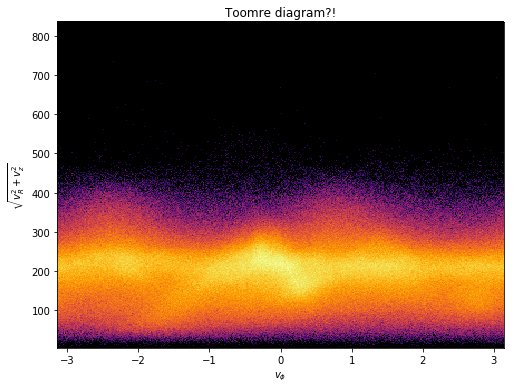

In [21]:
cmap = copy.copy(plt.cm.inferno)
cmap.set_bad((0,0,0))  # Fill background with black

fig, ax = plt.subplots(1, 1, figsize = (8,6))
h = ax.hist2d(x_vals, y_vals, bins = 401, norm=matplotlib.colors.LogNorm(), cmap = cmap)
ax.set_xlabel('$v_\phi$')
ax.set_ylabel('$\sqrt{v_R^2+v_z^2}$')
ax.set_title('Toomre diagram?!')

In [23]:
from areposnap.gadget import gadget_readenergy

efile = gadget_readenergy('/hits/universe/GigaGalaxy/level4_MHD/halo_24/output/')


In [32]:
efile.etots.shape


(6, 100)